<a href="https://colab.research.google.com/github/AngiePS/MT571-projects/blob/main/Copia_de_Parte_I_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import svd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#==========================
# ITEM a)
matd1= loadmat("/content/drive/MyDrive/MT571/dado1.mat")
X = matd1["X"]

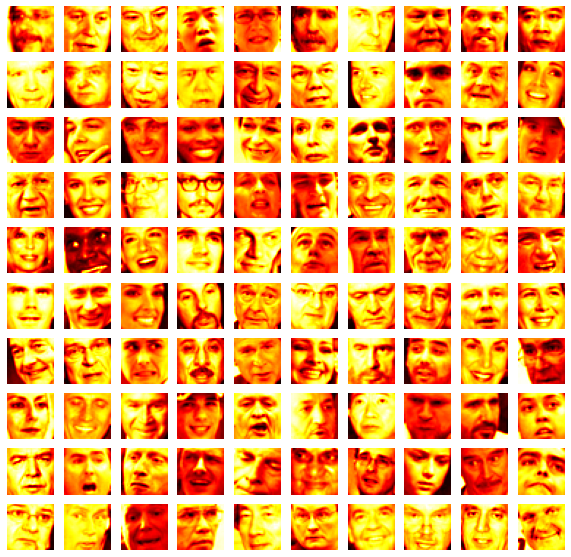

In [ ]:
#---------------------------------
# Mostrando 100 imagens aleatorias
fig,axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,len(X)+1),:].reshape(32,32,order="F"),cmap="hot")
        axis[i,j].axis("off")

In [ ]:
#-------------------------
# Funcoes envolvidas
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm,mu,sigma

In [ ]:
def pca(X):
    m,n = X.shape[0],X.shape[1]
    sigma = 1/m * X.T @ X
    U,S,V = svd(sigma)
    return U,S,V

In [ ]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))

    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]

    return Z

In [ ]:
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]

    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T

    return X_rec

In [ ]:
#----------------------------
# Normalizacao
X_norm,mu,std = featureNormalize(X)
U,S = pca(X_norm)[:2]

In [ ]:
print(U.shape)

(1024, 1024)


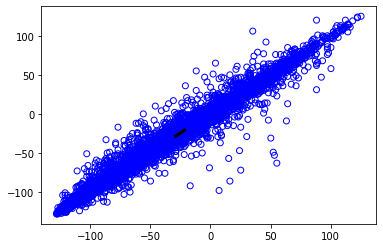

In [ ]:
#
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)


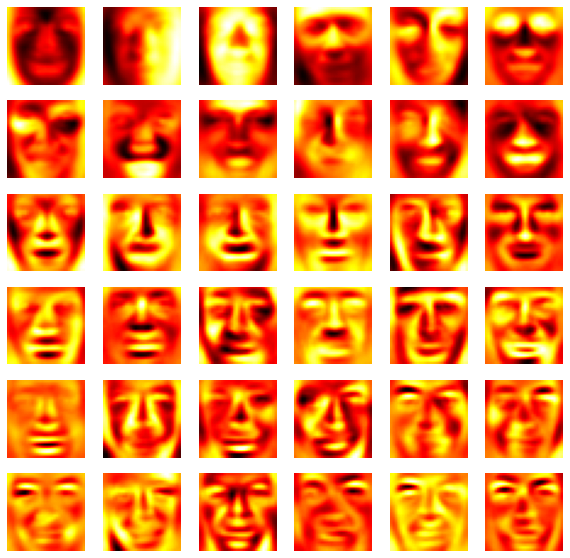

In [ ]:
#------------------------------------
# Item b)
# Mostrando eigenfaces para os primeiros 36 componentes principais
cp=U[:,:36]
fig,axis = plt.subplots(6,6,figsize=(10,10))
k=0
for i in range(6):
    for j in range(6):
        axis[i,j].imshow(cp[:,k].reshape(32,32,order="F"),cmap="hot")
        axis[i,j].axis("off")
        k+=1

# TALTA: Comente no relat´orio sobre o que observa nestas imagens.
# ADICIONAR COMENTARIOSSSSSSSSSSSSSSSSSSSSSSSSSS

In [ ]:
#--------------------------------------
# Item c)
# Projecao sobre os 100 componentes principais
K=100
Z = projectData(X_norm,U,K)

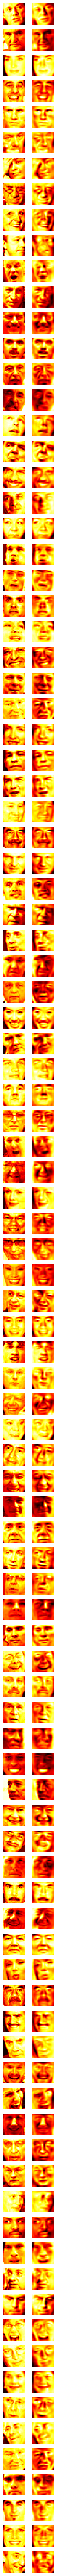

In [ ]:
# Reconstrucao
X_rec = recoverData(Z,U,K)
# Mostrando 100 imagens originais ao lado das imagens reconstruidas
fig,axis = plt.subplots(100,2,figsize=(2,100))
for i in range(100):
    ir=np.random.randint(0,len(X)+1) # tomando indices random
    axis[i,0].imshow(X[ir,:].reshape(32,32,order="F"),cmap="hot",  interpolation='nearest')
    axis[i,0].axis("off")

    axis[i,1].imshow(X_rec[ir,:].reshape(32,32,order="F"),cmap="hot", interpolation='nearest')
    axis[i,1].axis("off")

In [ ]:
# FALTA: Comente no relat´orio sobre o
# que achou da reconstru¸c˜ao e implicacoes praticas deste processo.